In [2]:
from io import StringIO
import numpy as np
import numpy.matlib as npm
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from sklearn.decomposition import PCA

In [3]:
dat = np.loadtxt('HestonTrainSet_ivol_201_neu_klein.txt')     # komprimierte Version des 100.000 Testdatensatzes
NModelPar = 5                                    

yy=dat[:len(dat),:NModelPar]                             
xx=dat[:len(dat),NModelPar:]                  

(10000, 784)
(10000, 5)


In [8]:
from sklearn.preprocessing import StandardScaler
scalex = StandardScaler()

xx_transform = scalex.fit_transform(xx)

In [6]:
def testPCAFit(matrix,n,three_D=False,scatter=False):
    samples = 20
    pca = PCA(n_components=n)
    pca.fit(matrix)

    reducedMatrixPCA = pca.transform(matrix)
    reconMatrixPCA = pca.inverse_transform(reducedMatrixPCA)

    reconCostPCA = np.mean(np.power(reconMatrixPCA - matrix,2),axis = 1)
    reconCostPCA = reconCostPCA.reshape(-1, 1)
    print('Reconstruction MSE : ',np.mean(reconCostPCA))
    
    if three_D:
        if scatter:
            fig = plt.figure(figsize=(10,6))
            ax = plt.axes(projection='3d')
            #ax.plot_wireframe(matrix[:,0],matrix[:,1],matrix[:,2])
            ax.scatter3D(reconMatrixPCA[:,0],reconMatrixPCA[:,1],reconMatrixPCA[:,2])
            #plt.savefig('C:\\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\LinearerFall\\3D_Scatter_mitPCA.png')
        else:
            X = reconMatrixPCA[:,0].reshape(samples,samples)
            Y = reconMatrixPCA[:,1].reshape(samples,samples)
            Z = reconMatrixPCA[:,2].reshape(samples,samples)

            fig = plt.figure(figsize=(10,6))
            ax = plt.axes(projection='3d')
            ax.plot_wireframe(X,Y,Z)
            #plt.savefig('C:\\Projekte\\dev\\git\\Masterarbeit\\PAC_Tests\\LinearerFall\\3D_mitPCA.png')
            #ax.view_init(0,-175)
    else:
        #print(reconMatrixPCA[:,1])
        fig = plt.figure(figsize=(10,6))
        plt.plot(reconMatrixPCA[:,0],reconMatrixPCA[:,1])
        #plt.savefig('C:\\Projekte\\dev\\git\Masterarbeit\\PAC_Tests\\LinearerFall\\2D_mitPCA.png')
    
    return np.mean(reconCostPCA)

In [98]:
df = pd.DataFrame(xx_transform)

## ----------------------------------------------------------------------------------------------------------------------------------
# Test in 2D

<Figure size 432x288 with 0 Axes>

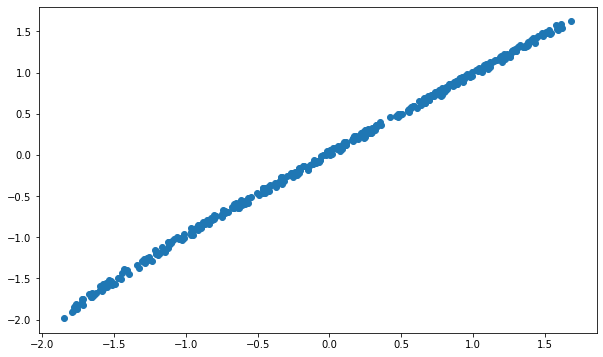

In [144]:
# Test in 2D
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(df.iloc[:400,0], df.iloc[:400,1])
#plt.savefig('C:\Projekte\dev\git\Masterarbeit\PAC_Tests\LinearerFall/2D_ohnePCA.png')
plt.show()

Reconstruction MSE :  1.9226071172004169e-32


1.9226071172004169e-32

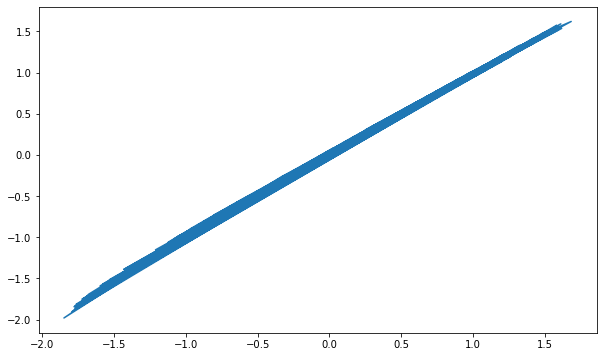

In [9]:
testPCAFit(xx_transform[:400,:2], 2)

## ----------------------------------------------------------------------------------------------------------------------------------
# Test in 3D

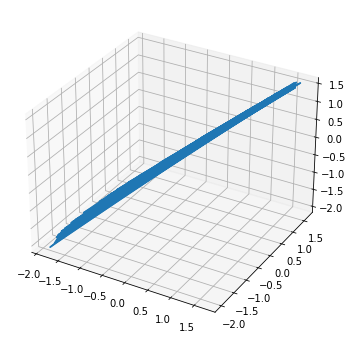

In [146]:
# Test in 3D
samples = 20
X = xx_transform[:400,0].reshape(samples,samples)
Y = xx_transform[:400,1].reshape(samples,samples)
Z = xx_transform[:400,2].reshape(samples,samples)

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.plot_wireframe(X,Y,Z)
#plt.savefig('C:\Projekte\dev\git\Masterarbeit\PAC_Tests\LinearerFall/3D_ohnePCA.png')

Reconstruction MSE :  1.829279216692954e-06


1.829279216692954e-06

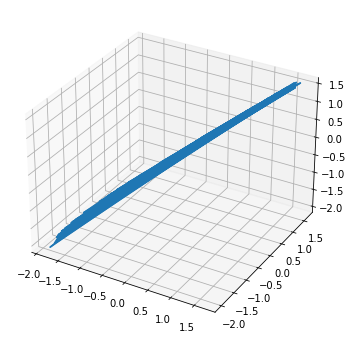

In [147]:
testPCAFit(xx_transform[:400,:3], 2, True)

## ----------------------------------------------------------------------------------------------------------------------------------
# Test in 3D mit ScatterPlot

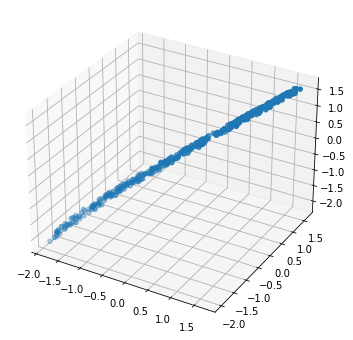

In [148]:
# Test mit ScatterPlot
samples = 20
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection='3d')
ax.scatter3D(xx_transform[:400,0],xx_transform[:400,1],xx_transform[:400,2])
#plt.savefig('C:\Projekte\dev\git\Masterarbeit\PAC_Tests\LinearerFall/3D_Scatter_ohnePCA.png')

Reconstruction MSE :  1.829279216692954e-06


1.829279216692954e-06

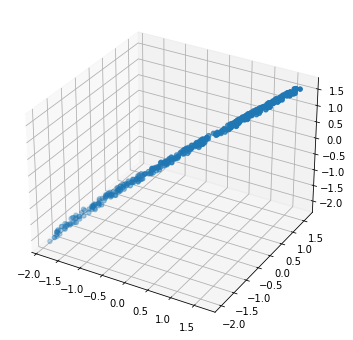

In [149]:
testPCAFit(xx_transform[:400,:3],2,True,scatter=True)